In [1]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
resnetModel = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 0s 0us/step


In [3]:
resnetModel
    

In [4]:
imagePath= "../input/dog-image/dog.101.jpg"

In [5]:
img=image.load_img(imagePath,target_size=(224,224))
x = image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [6]:
modelPredictions = resnetModel.predict(x)

1/1 [==============================] - 7s 7s/step


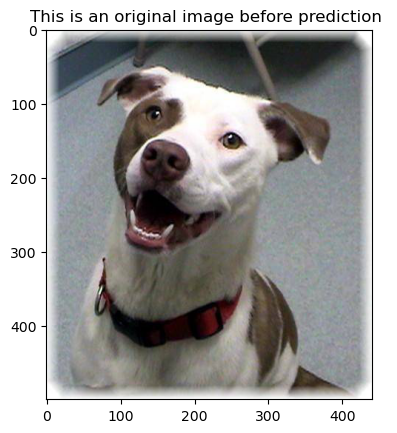

35363/35363 [==============================] - 0s 0us/step
predicted class : American Staffordshire
Accuracy : 0.5255529284477234


In [7]:
imageRead = plt.imread("../input/dog-image/dog.101.jpg")
plt.imshow(imageRead)
plt.title("This is an original image before prediction ")
plt.show()
#print("prediction result is : {}".format(decode_predictions(modelPredictions,top = 3)[0]))

#_,classnames,accuracy = decode_predictions(modelPredictions,top =3)[0]
#print ("prediction class :{}\n accuracy : {}%".format(classnames,accuracy))
_,classnames,accuracy = decode_predictions(modelPredictions,top =3)[0][0]
r = classnames.split("_")
classNameFirst,classNameLast = r[0].title(), r[1].title()
print("predicted class : {} {}\nAccuracy : {}". format(classNameFirst,classNameLast,accuracy))

In [8]:
decode_predictions(modelPredictions, top = 3)

[[('n02093428', 'American_Staffordshire_terrier', 0.5255529),
  ('n02093256', 'Staffordshire_bullterrier', 0.18308389),
  ('n02091244', 'Ibizan_hound', 0.06732622)]]

In [9]:
_, classnames, accuracy = decode_predictions(modelPredictions, top = 3)[0][0]
r = classnames.split("_")
classNameFirst, classNameLast= r[0].title(), r[1].title()
print("Predicted Class: {} {}\nAccuracy : {}%".format(classNameFirst, classNameLast, accuracy))

Predicted Class: American Staffordshire
Accuracy : 0.5255529284477234%


In [10]:
r = classnames.split("_")

In [11]:
classNameFirst, classNameLast= r[0].title(), r[1].title()

# CNN Basic Layer 

In [12]:
#model = Sequential()
#input layer 01
#model.add(Conv2D())
#model.add(MaxPooling2D(pool_size = (2,2)))

# Hidden layer 01 
#model.add(Conv2D())
#model.add(MaxPooling2D( pool_size = (2,2)))

# Hidden layer 02 
#model.add(Conv2D())
#model.add(MaxPooling2D( pool_size = (2,2)))

# Hidden layer 03 
#model.add(Conv2D(128))
#model.add(MaxPooling2D( pool_size = (2,2)))

# Flatten layer 
#model.add(Flatten())

#Fully connected layer

#model.add(Dense(128))
#model .add(Dense(number_of_classes))

In [13]:
def drawTextonImage(names,predictions,input_image) :
    backgroundColor = [0,0,0]
    expandImage = cv2.copyMakeBorder(input_image,0,0,0,imageL.shape[1]+300, cv2.BORDER_CONSTANT,value = backgroundColor)
    image_width = input_image.shape[1]
    for(i,predictions) in enumerate(predictions) :
        imageStrings = str(predictions[1]) + " " + str( predictions[2])
        cv2.putText(expandImage, str(names), (image_width + 50,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(255,255,255),1)
        cv2.putText(expandImage, imageStrings, (image_width + 50, 50+((i+1)*50)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1)
        plt.imshow(expandImage)
imagepath = "../input/dogs-cats-images/dataset/test_set/cats/"
imageFileName = [f for f in listdir(imagepath) if isfile(join(imagepath,f)) ]

In [14]:
len(imageFileName)

1000

1/1 [==============================] - 0s 28ms/step


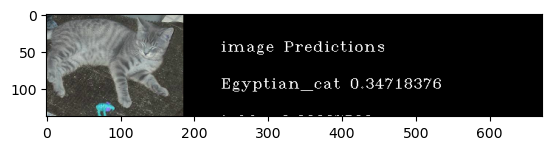

In [15]:
from tensorflow.keras.preprocessing import image 
for file in imageFileName :
    img = image.load_img(imagepath+file, target_size =(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    x = preprocess_input(x) 
    imageNew = cv2.imread(imagepath+file)
    imageL = cv2.resize(imageNew,None,fx = 0.5, fy = 0.5 , interpolation = cv2.INTER_CUBIC)
    predictions = resnetModel.predict(x)
    predictions = decode_predictions(predictions,top = 3)[0] 
    drawTextonImage("image Predictions",predictions,imageL)